# Generating Synthetic World Population using Walker's Alias method

In this notebook, I generate synthetic world populations based on statistic information of population per country from 2019. I used Walker's Alias method.<br><br>
First, I amend the code for Walker's Alias method (as it was originally written for Python 2), then create a synthetic world population and finally compare the two.



### Walker's Alias method implementation

Code for the Walkerradnom class amended from: <br>
https://code.activestate.com/recipes/576564-walkers-alias-method-for-random-objects-with-diffe/ <br>


In [1]:
from __future__ import division
import random

__author__ = "Maciej Tarsa, Denis Bzowy"
__version__ = "22may2021"

In [2]:
class Walkerrandom:
  """ Walker's alias method for random objects with different probablities
  """

  def __init__( self, weights, keys=None ):
    """ builds the Walker tables prob and inx for calls to random().
        The weights (a list or tuple or iterable) can be in any order;
        they need not sum to 1.
    """
    n = self.n = len(weights)
    self.keys = keys
    sumw = sum(weights)
    prob = [w * n / sumw for w in weights]  # av 1
    inx = [-1] * n
    short = [j for j, p in enumerate( prob ) if p < 1]
    long = [j for j, p in enumerate( prob ) if p > 1]
    while short and long:
        j = short.pop()
        k = long[-1]
        # assert prob[j] <= 1 <= prob[k]
        inx[j] = k
        prob[k] -= (1 - prob[j])  # -= residual weight
        if prob[k] < 1:
            short.append( k )
            long.pop()
    self.prob = prob
    self.inx = inx

  def __str__( self ):
    """ e.g. "Walkerrandom prob: 0.4 0.8 1 0.8  inx: 3 3 -1 2" """
    probstr = " ".join([ "%.2g" % x for x in self.prob ])
    inxstr = " ".join([ "%.2g" % x for x in self.inx ])
    return "Walkerrandom prob: %s  inx: %s" % (probstr, inxstr)

#...............................................................................
  def random( self ):
    """ each call -> a random int or key with the given probability
        fast: 1 randint(), 1 random.uniform(), table lookup
    """
    u = random.uniform( 0, 1 )
    j = random.randint( 0, self.n - 1 )  # or low bits of u
    randint = j if u <= self.prob[j] \
        else self.inx[j]
    return list(self.keys)[randint]

## Synthetic countries population

Data for country populations taken from:<br>
https://data.worldbank.org/indicator/SP.POP.TOTL


Some data preparation has been done using Excel - as most of it was easiest to do via the visual method:
- removal of region totals
- removal of first two rows containing metadata
- removal of all year fields apart from 2019
- removal of Eritrea, as it only contained data up to 2011

In [ ]:
# import data into pandas
import pandas as pd
input = pd.read_csv('./population.csv')
input = input.rename(columns={"Country Name": "Country_name", "Country Code": "Country_code", "2019": "Real_pop"})
input.head()

,Country_name,Country_code,Real_pop
0,China,CHN,1397715000
1,India,IND,1366417754
2,United States,USA,328239523
3,Indonesia,IDN,270625568
4,Pakistan,PAK,216565318


In [ ]:
# sum the total population
real_total = input['Real_pop'].sum()
print(real_total)

7656340905


In [ ]:
# create a new row for percentage of total population
input['Real_perc'] = input['Real_pop']/real_total
input.head()

,Country_name,Country_code,Real_pop,Real_perc
0,China,CHN,1397715000,0.182557
1,India,IND,1366417754,0.178469
2,United States,USA,328239523,0.042872
3,Indonesia,IDN,270625568,0.035347
4,Pakistan,PAK,216565318,0.028286


Now I can use this data for generation of synthetic records using Walker's Alias method

In [ ]:
# number of records to generate
# the same number as real records could be used
#Nrand = real_total
# or a smaller value, e.g. 1 million
Nrand = 1000000


from datetime import datetime
import time as t
start_ts = t.time()
now_start = datetime.now()
print(f"Starting generation on {now_start.strftime('%d/%m/%Y %H:%M:%S')}")
print()

print(Nrand, "Walkerrandom countries")

# set up the 'buckets' for walker's alias method
wrand = Walkerrandom(input['Real_pop'], input['Country_code'])
from collections import defaultdict
nrand = defaultdict(int)
# sample randomly from the distribution
for _ in range(Nrand):
  j = wrand.random()
  # sum the records for each country
  # here we could be creating a record for each generate 'person'
  nrand[j] += 1
  
# print the totals per country
s = str(sorted(nrand.items()))
print()
now_end = datetime.now()
print(f"Generation finished at {now_end.strftime('%d/%m/%Y %H:%M:%S')}")
print(f"Running time: {(t.time()-start_ts)/60} minutes")
print(s)


Starting generation on 22/05/2021 20:59:09

1000000 Walkerrandom countries

Generation finished at 22/05/2021 20:59:32
Running time: 0.37904158035914104 minutes
[('ABW', 12), ('AFG', 4948), ('AGO', 4160), ('ALB', 351), ('AND', 10), ('ARE', 1201), ('ARG', 5818), ('ARM', 382), ('ASM', 10), ('ATG', 13), ('AUS', 3285), ('AUT', 1130), ('AZE', 1240), ('BDI', 1546), ('BEL', 1476), ('BEN', 1496), ('BFA', 2725), ('BGD', 21372), ('BGR', 911), ('BHR', 219), ('BHS', 39), ('BIH', 444), ('BLR', 1207), ('BLZ', 46), ('BMU', 12), ('BOL', 1530), ('BRA', 27382), ('BRB', 40), ('BRN', 62), ('BTN', 107), ('BWA', 295), ('CAF', 612), ('CAN', 4984), ('CHE', 1103), ('CHI', 29), ('CHL', 2447), ('CHN', 182905), ('CIV', 3389), ('CMR', 3486), ('COD', 11463), ('COG', 765), ('COL', 6626), ('COM', 123), ('CPV', 73), ('CRI', 687), ('CSS', 997), ('CUB', 1480), ('CUW', 22), ('CYM', 12), ('CYP', 155), ('CZE', 1378), ('DEU', 10984), ('DJI', 139), ('DMA', 7), ('DNK', 749), ('DOM', 1411), ('DZA', 5586), ('ECU', 2246), ('EGY'

In [ ]:
df = pd.DataFrame.from_dict(nrand, orient='index', columns=['Synth_pop'])
df['Country_code'] = df.index
output = pd.merge(df,input,left_on=['Country_code'], right_on = ['Country_code'], how = 'left')
synth_total = output['Synth_pop'].sum()
output['Synth_perc'] = output['Synth_pop']/synth_total
output['Diff'] = abs(output['Real_perc']-output['Synth_perc'])
output.head()

,Synth_pop,Country_code,Country_name,Real_pop,Real_perc,Synth_perc,Diff
0,178343,IND,India,1366417754,0.178469,0.178343,0.000126
1,14081,PHL,Philippines,108116615,0.014121,0.014081,0.000040
2,4984,CAN,Canada,37589262,0.004910,0.004984,0.000074
3,3486,CMR,Cameroon,25876380,0.003380,0.003486,0.000106
4,12505,VNM,Vietnam,96462106,0.012599,0.012505,0.000094


In [ ]:
print(f"Smallest difference {output['Diff'].min()}")
print(f"Biggest difference {output['Diff'].max()}")
print(f"Average difference {output['Diff'].mean()}")

Smallest difference 7.2851075588307e-08
Biggest difference 0.000446408064269703
Average difference 3.3005597386725265e-05


## Population of the UK by gender and age

In [9]:
# import data into pandas
import pandas as pd
input = pd.read_csv('./population_gender_age.csv')
# only keep the records for 2021
input = input.loc[input['Time'] == 2021]
# remove aggregares
input = input.loc[input['LocID'] < 900]
input.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
1491,4,Afghanistan,2,Medium,2021,2021.5,0-4,0,5,2932.252,2792.395,5724.647
1492,4,Afghanistan,2,Medium,2021,2021.5,5-9,5,5,2790.513,2653.944,5444.457
1493,4,Afghanistan,2,Medium,2021,2021.5,10-14,10,5,2678.248,2564.119,5242.367
1494,4,Afghanistan,2,Medium,2021,2021.5,15-19,15,5,2428.348,2301.586,4729.934
1495,4,Afghanistan,2,Medium,2021,2021.5,20-24,20,5,2082.113,1972.986,4055.099


In [10]:
# count how many countries there are
input['Location'].nunique()

201

In [181]:
# show values for United Kingdom
df_uk = input.loc[input['Location'].str.startswith('United Kingdom')]
df_uk['perc_total'] = df_uk['PopTotal']/df_uk['PopTotal'].sum()
df_uk

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal,perc_total
1279404,826,United Kingdom,2,Medium,2021,2021.5,0-4,0,5,1980.901,1888.382,3869.283,0.056728
1279405,826,United Kingdom,2,Medium,2021,2021.5,5-9,5,5,2109.630,2011.679,4121.309,0.060423
1279406,826,United Kingdom,2,Medium,2021,2021.5,10-14,10,5,2060.297,1969.542,4029.839,0.059082
1279407,826,United Kingdom,2,Medium,2021,2021.5,15-19,15,5,1901.352,1824.461,3725.813,0.054625
1279408,826,United Kingdom,2,Medium,2021,2021.5,20-24,20,5,2040.217,1969.998,4010.215,0.058795
1279409,826,United Kingdom,2,Medium,2021,2021.5,25-29,25,5,2253.592,2183.886,4437.478,0.065059
1279410,826,United Kingdom,2,Medium,2021,2021.5,30-34,30,5,2366.433,2340.771,4707.204,0.069013
1279411,826,United Kingdom,2,Medium,2021,2021.5,35-39,35,5,2309.794,2336.088,4645.882,0.068114
1279412,826,United Kingdom,2,Medium,2021,2021.5,40-44,40,5,2171.727,2186.507,4358.234,0.063897
1279413,826,United Kingdom,2,Medium,2021,2021.5,45-49,45,5,2113.927,2147.910,4261.837,0.062484


In [182]:
# show total for UK
uk_total = int(df_uk['PopTotal'].sum() * 1000)
uk_total

68207114

I can also visualise this spread using a population pyramid.<br>
Code adapted from: https://www.statology.org/population-pyramid-python/

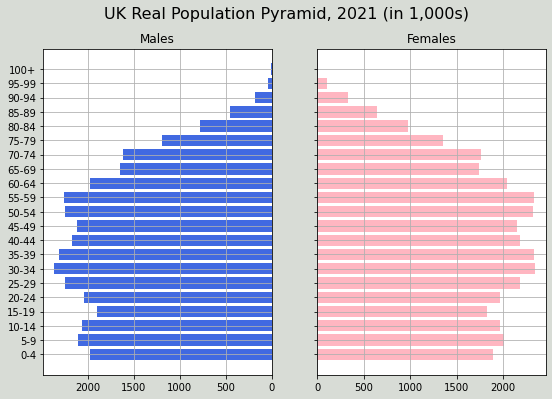

In [183]:
import matplotlib.pyplot as plt
#define x and y limits
y = range(0, len(df_uk))
x_male = df_uk['PopMale']
x_female = df_uk['PopFemale']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.95,"UK Real Population Pyramid, 2021 (in 1,000s)", fontsize=16, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_uk['AgeGrp'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

I will now use Walker's Alias method to generate synthetic population of the UK with the same characteristics for gender and age as the real data.

In [184]:
# number of records to generate
Nrand = 1000000
#Nrand = int(uk_total)

# set up data for each age group by gender
age_t = df_uk[['AgeGrp','PopMale', 'PopFemale']]
age_t = age_t.set_index('AgeGrp')

from datetime import datetime
import time as t
start_ts = t.time()
now_start = datetime.now()
print(f"Starting generation on {now_start.strftime('%d/%m/%Y %H:%M:%S')}")
print()

print(Nrand, "Walkerrandom UK population")

# set up the 'buckets' for walker's alias method
# first do an age group
wrand = Walkerrandom(df_uk['PopTotal'], df_uk['AgeGrp'])
from collections import defaultdict
total_nrand = defaultdict(int)
gender_nrand = defaultdict(int)
# sample randomly from the distribution
for _ in range(Nrand):
  j = wrand.random()

  # set up data for each age group by gender
  #age_T = df_uk.loc[df_uk['AgeGrp'] == j][['PopMale', 'PopFemale']].T
  #age_T['Gender'] = age_T.index

  # and a second iteration of Walker Alias
  gender_wrand = Walkerrandom(age_t.loc[j], ['Male','Female'])
  k = gender_wrand.random()
  total_nrand[j,k] += 1
  
  # here we could be creating a record for each generate 'person'
  #df_uk_synth.loc[df_uk_synth['Age'] == j, 'Total'] += 1
  

# print the totals per country
s = str(sorted(total_nrand.items()))
print()
now_end = datetime.now()
print(f"Generation finished at {now_end.strftime('%d/%m/%Y %H:%M:%S')}")
print(f"Running time: {(t.time()-start_ts)/60} minutes")
print(s)

Starting generation on 23/05/2021 11:58:42

1000000 Walkerrandom UK population

Generation finished at 23/05/2021 12:00:41
Running time: 1.9794954260190327 minutes
[(('0-4', 'Female'), 27714), (('0-4', 'Male'), 29408), (('10-14', 'Female'), 28813), (('10-14', 'Male'), 30084), (('100+', 'Female'), 214), (('100+', 'Male'), 42), (('15-19', 'Female'), 26621), (('15-19', 'Male'), 28006), (('20-24', 'Female'), 28937), (('20-24', 'Male'), 29856), (('25-29', 'Female'), 31788), (('25-29', 'Male'), 33063), (('30-34', 'Female'), 34145), (('30-34', 'Male'), 34734), (('35-39', 'Female'), 34244), (('35-39', 'Male'), 33919), (('40-44', 'Female'), 32062), (('40-44', 'Male'), 31897), (('45-49', 'Female'), 31381), (('45-49', 'Male'), 31135), (('5-9', 'Female'), 29503), (('5-9', 'Male'), 30709), (('50-54', 'Female'), 34376), (('50-54', 'Male'), 33116), (('55-59', 'Female'), 34307), (('55-59', 'Male'), 32917), (('60-64', 'Female'), 29968), (('60-64', 'Male'), 28784), (('65-69', 'Female'), 25508), (('65-69

In [185]:
# convert the result to dataframe
uk_pop_synth = pd.DataFrame(total_nrand, index = [0])
uk_pop_synth = uk_pop_synth.T
uk_pop_synth = uk_pop_synth.unstack(level=-1)
uk_pop_synth.columns = uk_pop_synth.columns.droplevel()
uk_pop_synth.reset_index(level=0, inplace=True)
uk_pop_synth['Age'] = uk_pop_synth['index']
uk_pop_synth['index'] = uk_pop_synth['index'].str.extract(r'(^\d+)')
uk_pop_synth['index'] = pd.to_numeric(uk_pop_synth['index'])
uk_pop_synth = uk_pop_synth.sort_values(by=['index'])

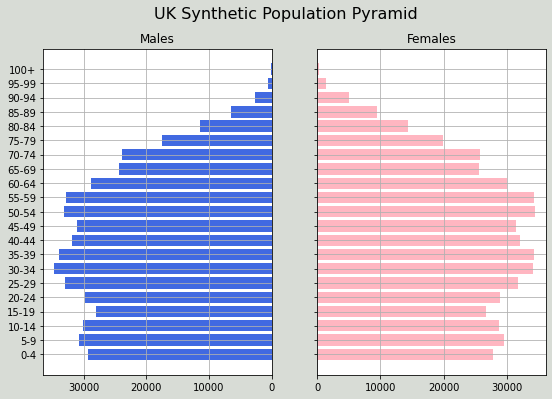

In [186]:
# visualise as a pyramid
import matplotlib.pyplot as plt
#define x and y limits
y = range(0, len(df_uk))
x_male = uk_pop_synth['Male']
x_female = uk_pop_synth['Female']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.95,"UK Synthetic Population Pyramid", fontsize=16, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=uk_pop_synth['Age'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

Visual inspection indicates the spread of the population to be similar for the real population compared to the synthetically generated.